# Hi there, I'm Salma!
#### I'm a 2A Systems Design Engineering student with a strong passion for using technology to transform the medical industry. My goal is to design solutions that improve people's quality of life through innovation and human-centered design. I’ve recently developed a growing interest in applying AI to healthcare, and I am especially inspired by See-DR’s mission. I'm super excited about the opportunity to contribute to this meaningful work and support its impact.

## Step #1 Generate 2 images
#### I will create 2 synthetic images, using numpy arrays to define the pixel values

In [37]:
# Import necessary libraries
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # to plot and displaying images
from skimage.transform import swirl # to apply swirl transformation

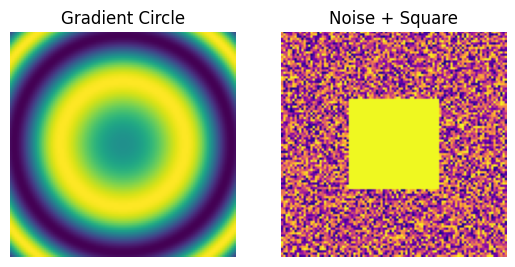

In [38]:
# Image 1: Gradient with concentric circles
x = np.linspace(-1, 1, 100)                   # create 100 evenly spaced points between -1 and 1 on x-axis
y = np.linspace(-1, 1, 100)                   # do same for y-axis
X, Y = np.meshgrid(x, y)                      # create 2D grid by pairing all (x,y) coordinates

# apply transformation:
# 1. x**2 + y**2 -> compute distance from orgin to create concentric circles
# 2. multiply by 5 -> scales radii by factor of 5
# 3. pass through sin -> oscillates between -1 and 1, creates a wavy ring pattern in Z axis
image1 = np.sin(5 * (X**2 + Y**2))

# Image 2: Random noise with a bright square
image2 = np.random.rand(100, 100)             # 100 x 100 matrix with random noise in range [0, 1]
image2[30:70, 30:70] += 1                     # brighten a 40x40 square in the center (adding increases brightness)
image2 = np.clip(image2, 0, 1)                # clip all pixels to keep values within [0, 1]


# Display the two images side by side
plt.subplot(1, 2, 1)                          # create plot with 1 row, 2 columns, select subplot #1
plt.imshow(image1, cmap='viridis')            # use the "viridis" colormap (purple → green → yellow)
plt.title("Gradient Circle")
plt.axis('off')                               # hide axes

plt.subplot(1, 2, 2)                          # select subplot #2
plt.imshow(image2, cmap='plasma')             # use the "plasma" colormap (blue → red → yellow)
plt.title("Noise + Square")
plt.axis('off')

plt.show()

# Step #2 - Apply a transformation to the images

### I will be solarizing image1 (inverting pixels above a threshold) and swirling image2 about the center

In [ ]:
# Image 1: Solarization
threshold = 0.5                          # any pixels brighter than 0.5 will be inverted
image1_solar = image1.copy()             #  create copy of original image

# invert pixel values above the threshold:
# ex. a pixel of 0.8 becomes 1 - 0.8 = 0.2
image1_solar[image1 > threshold] = 1 - image1[image1 > threshold]

# Image 2: Swirl transformation
# apply swirl around the center of the image
# - strength: how strong pixels are rotated
# - radius: size of swirling area
image2_swirl = swirl(image2, strength=20, radius=100)